<a href="https://colab.research.google.com/github/sudershan1993/AIML/blob/main/Sales_predection_regressionModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import numpy as np
from pandas import read_csv
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import seaborn as sns
dataset = read_csv('/content/sample_data/Advertising.csv')


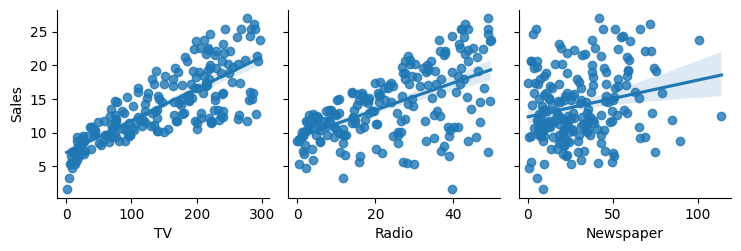

In [34]:
# Linear regression plots to visualize the relationship between each independent variable and the dependent variable

sns.pairplot(data=dataset,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',kind='reg')


In [35]:
# get the info of your Dataset
print(dataset.shape)
print(dataset.head(5))
print(dataset.columns)
print(dataset.info())
print(dataset.describe().T)


(200, 4)
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9
Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None
           count      mean        std  min     25%     50%      75%    max
TV         200.0  147.0425  85.854236  0.7  74.375  149.75  218.825  296.4
Radio      200.0   23.2640  14.846809  0.0   9.975   22.90   36.525   49.6
Newspaper  200.0   30.5540  21.778621  0.3  12.750   25.75   45.100  114.0
Sales      200.0   14.0225   5.217457

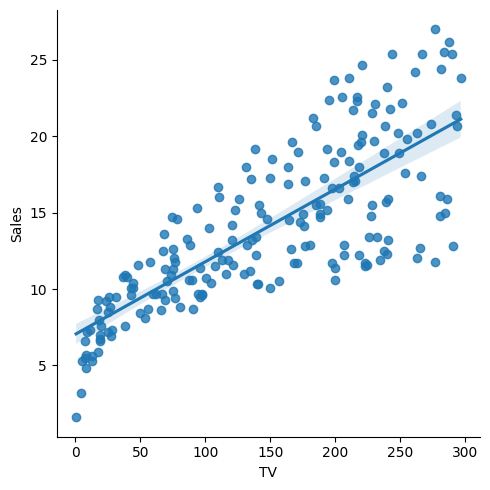

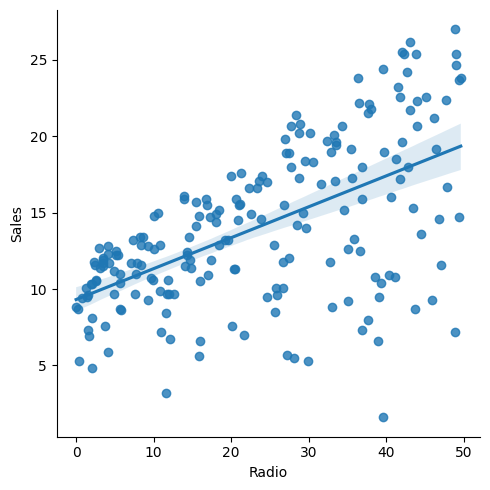

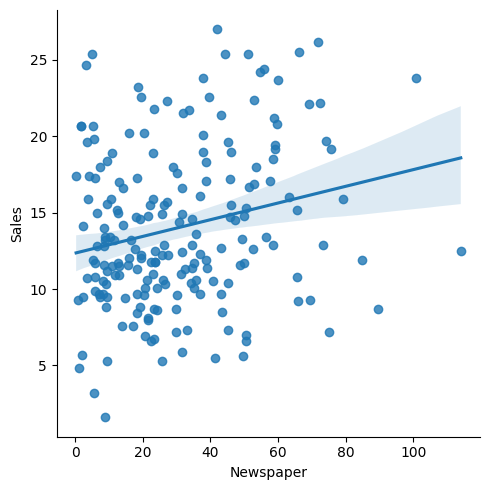

In [36]:
# Linear regression plots to visualize the relationship between each independent variable and the dependent variable
sns.lmplot(x='TV', y='Sales', data=dataset)
sns.lmplot(x='Radio', y='Sales', data=dataset)
sns.lmplot(x='Newspaper',y= 'Sales', data=dataset)

In [37]:
array = dataset.values
# include all columns from 0 to 2 except 3 as input to model
inputx = array[:,0:3]

# include only 3rd column as output to model
outputy = array[:,3]

# split whole data into train and test data using train_test_split method
input_train, input_test, output_train, output_test = train_test_split(inputx, outputy, test_size =0.25, random_state = 7)

# used model name
model = LinearRegression()
#print("\nThe parameters of the model are\n\n",model.get_params())
print("\nThe model we are using is ", model.fit(input_train, output_train))


The model we are using is  LinearRegression()


In [41]:
# test the model prediction from user inputs
tv_Budget = float(input("\nWhats the TV Budget"))
radio_Budget = float(input("\nWhats the Radio Budget"))
newsPaper_Budget = float(input("\nWhats the NewsPaper Budget"))
# Collect inputs into a list first


Whats the TV Budget76.3

Whats the Radio Budget27.5

Whats the NewsPaper Budget16


In [42]:
InputList = [tv_Budget, radio_Budget,newsPaper_Budget]
testinput = np.array([InputList])
predicted_output = model.predict(testinput)
print('\nThe input is',InputList)
print('\nThe Sales for the input is ',predicted_output)


The input is [76.3, 27.5, 16.0]

The Sales for the input is  [11.46152578]


In [47]:
# now we will test it for the whole test data created by using train_test_split method
print("\nThe test input for number of Sales units is as follows \n")
print(input_test[:10])
# model predicting the Test set results
predicted_output = model.predict(input_test)
print("\nThe output (Sales units) for the test input is as follows \n")
print(predicted_output[:10])


The test input for number of Sales units is as follows 

[[ 76.3  27.5  16. ]
 [141.3  26.8  46.2]
 [ 13.2  15.9  49.6]
 [214.7  24.    4. ]
 [ 38.2   3.7  13.8]
 [ 17.2  45.9  69.3]
 [ 18.8  21.7  50.4]
 [107.4  14.   10.9]
 [ 31.5  24.6   2.2]
 [102.7  29.6   8.4]]

The output (Sales units) for the test input is as follows 

[11.46152578 14.37422244  6.32339413 17.28886103  5.20329537 12.14843077
  7.67584543 10.38160984  8.81798137 13.09349415]


In [45]:
# We will calculate :

#MeanSquareError(Average of squared differences between predicted and actual values)
mse = mean_squared_error(output_test, predicted_output)

#Root MSE(Same scale as target variable)
rmse = np.sqrt(mse)  # manually take square root

#Mean absolute error (Average absolute difference)
mae = mean_absolute_error(output_test, predicted_output)
# r2(How much variance the model explains (1 = perfect, 0 = baseline))
r2 = r2_score(output_test, predicted_output)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R2 score:", r2)

MSE: 2.4626045763794977
RMSE: 1.569268803098914
MAE: 1.188126423384337
R2 score: 0.9044150723953952
